<a href="https://colab.research.google.com/github/kiranbk527/Data6000/blob/main/Dementia_Prevalence_forecast_2025_2030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()  # upload: "Clean Prevalence data by age and sex.csv" and "Dementia Number 2010-2025.csv"


TypeError: 'NoneType' object is not subscriptable

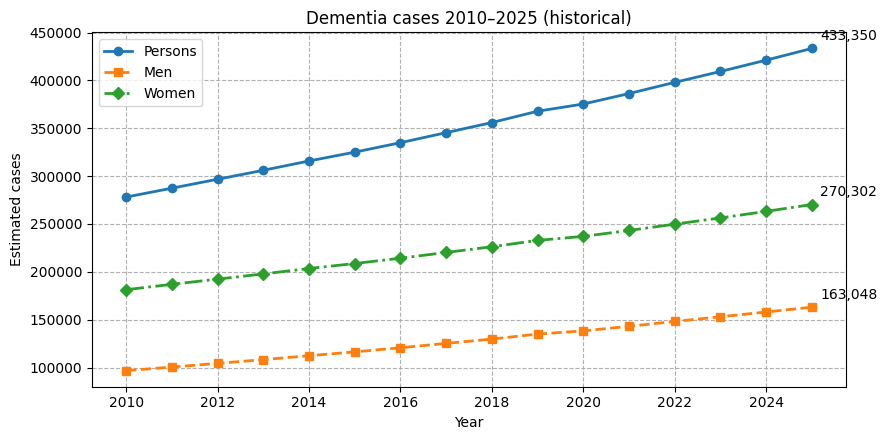

In [ ]:
# B1 — Self-contained loader + cleaned historical trend plot (Persons, Men, Women)
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os

# 1) Read the CSV (auto-prompt upload if missing)
fname = "Dementia Number 2010-2025.csv"
try:
    d = pd.read_csv(fname, skiprows=1, names=["Year","Men","Women","Persons"])
except FileNotFoundError:
    from google.colab import files
    uploaded = files.upload()  # pick your "Dementia Number 2010-2025.csv"
    fname = next(iter(uploaded.keys()))
    d = pd.read_csv(fname, skiprows=1, names=["Year","Men","Women","Persons"])

# 2) Clean numbers/years
for c in ["Men","Women","Persons"]:
    d[c] = (d[c].astype(str).str.replace(",", "", regex=False).str.strip())
    d[c] = pd.to_numeric(d[c], errors="coerce")

d["Year"] = pd.to_numeric(d["Year"], errors="coerce").astype("Int64")
d = d.dropna(subset=["Year"]).astype({"Year": int}).set_index("Year").sort_index()
d = d.dropna(how="all", subset=["Men","Women","Persons"])

# 3) Plot nicer historical trend with endpoint labels
plt.rcParams.update({"figure.figsize": (9,4.5), "axes.grid": True, "grid.linestyle": "--"})

plt.figure()
for col, ls, mk in [("Persons","-","o"), ("Men","--","s"), ("Women","-.", "D")]:
    y = d[col].dropna()
    if len(y):
        plt.plot(y.index, y.values, linestyle=ls, marker=mk, linewidth=2, label=col)
        plt.annotate(f"{int(y.iloc[-1]):,}", (y.index[-1], y.iloc[-1]),
                     textcoords="offset points", xytext=(6,6))

plt.title("Dementia cases 2010–2025 (historical)")
plt.xlabel("Year"); plt.ylabel("Estimated cases")
plt.legend(); plt.tight_layout(); plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

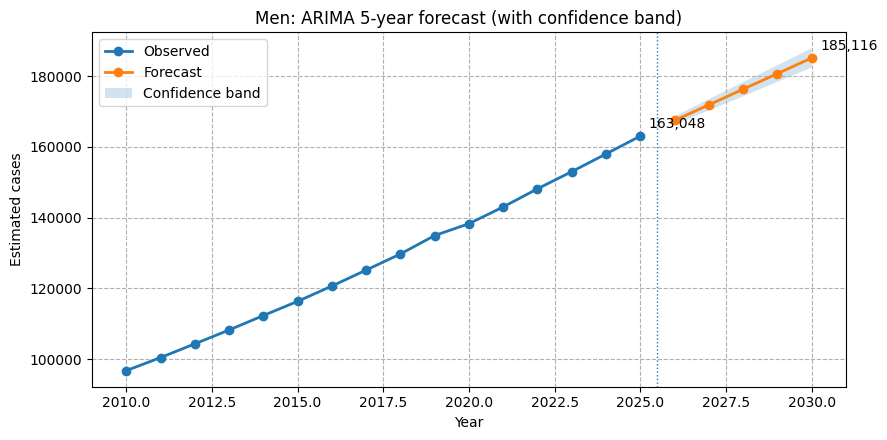

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

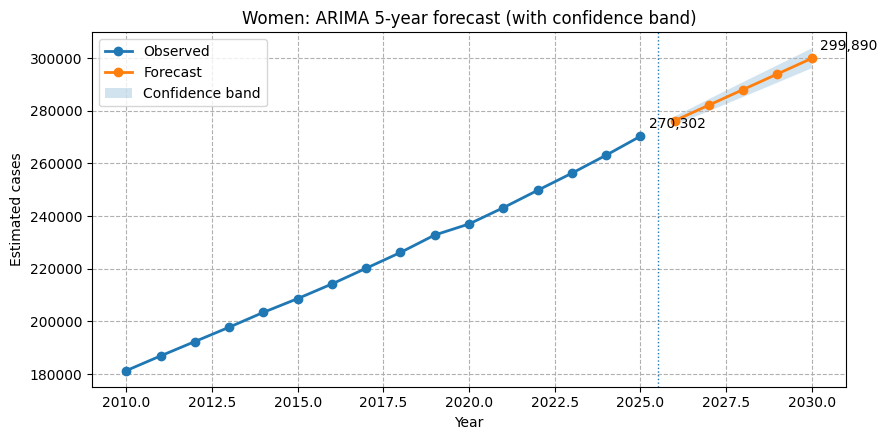

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

for col in ["Men","Women"]:
    y = d[col].dropna()
    fit = ARIMA(y, order=(1,1,1)).fit()
    steps = 5
    res = fit.get_forecast(steps=steps)
    fc = res.predicted_mean
    ci = res.conf_int()
    fyears = range(y.index.max()+1, y.index.max()+steps+1)

    plt.figure()
    plt.plot(y.index, y.values, marker="o", linewidth=2, label="Observed")
    plt.plot(list(fyears), fc.values, marker="o", linewidth=2, label="Forecast")
    plt.fill_between(list(fyears), ci.iloc[:,0].values, ci.iloc[:,1].values, alpha=0.2, label="Confidence band")
    plt.axvline(y.index.max()+0.5, linestyle=":", linewidth=1)

    # annotate last points
    plt.annotate(f"{int(y.iloc[-1]):,}", (y.index[-1], y.iloc[-1]), textcoords="offset points", xytext=(6,6))
    plt.annotate(f"{int(fc.iloc[-1]):,}", (fyears[-1], fc.iloc[-1]), textcoords="offset points", xytext=(6,6))

    plt.title(f"{col}: ARIMA 5-year forecast (with confidence band)")
    plt.xlabel("Year"); plt.ylabel("Estimated cases")
    plt.legend(); plt.tight_layout(); plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

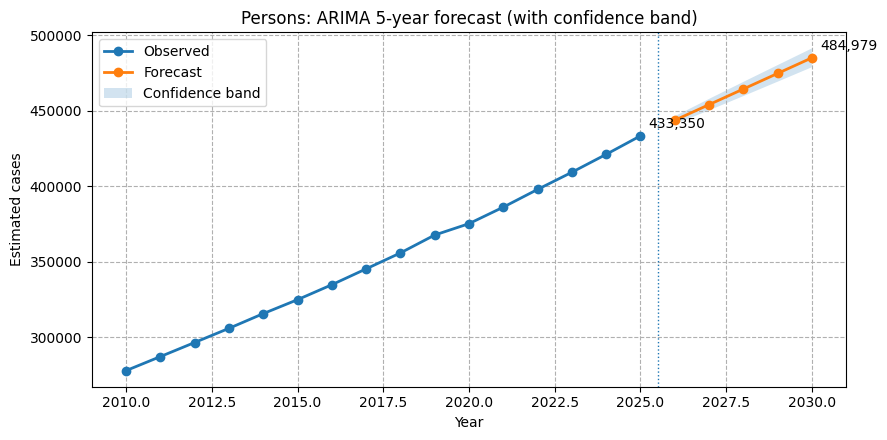

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

y = d["Persons"].dropna()
split_year = y.index.max()  # last observed year

# Fit a simple, robust model (tweak order if needed)
fit = ARIMA(y, order=(1,1,1)).fit()

steps = 5  # 5-year forecast
res = fit.get_forecast(steps=steps)
fc = res.predicted_mean
ci = res.conf_int()

fyears = range(split_year+1, split_year+steps+1)

plt.figure()
# observed
plt.plot(y.index, y.values, marker="o", linewidth=2, label="Observed")
# forecast
plt.plot(list(fyears), fc.values, marker="o", linewidth=2, label="Forecast")
# confidence interval (shaded)
plt.fill_between(list(fyears), ci.iloc[:,0].values, ci.iloc[:,1].values, alpha=0.2, label="Confidence band")

# vertical split marker
plt.axvline(split_year+0.5, linestyle=":", linewidth=1)

# label last obs & last fc
plt.annotate(f"{int(y.iloc[-1]):,}", (y.index[-1], y.iloc[-1]), textcoords="offset points", xytext=(6,6))
plt.annotate(f"{int(fc.iloc[-1]):,}", (fyears[-1], fc.iloc[-1]), textcoords="offset points", xytext=(6,6))

plt.title("Persons: ARIMA 5-year forecast (with confidence band)")
plt.xlabel("Year"); plt.ylabel("Estimated cases")
plt.legend(); plt.tight_layout(); plt.show()
